# Data Cleaning

In [1]:
import pandas as pd
data = pd.read_csv('iris_data.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
data.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool

In [4]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [5]:
data.isna().any().sum()

0

# Data selection Using Filter Method

In [6]:
import pandas as pd
data = pd.read_csv('iris_data.csv')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [7]:
df = pd.read_csv('iris_data.csv')

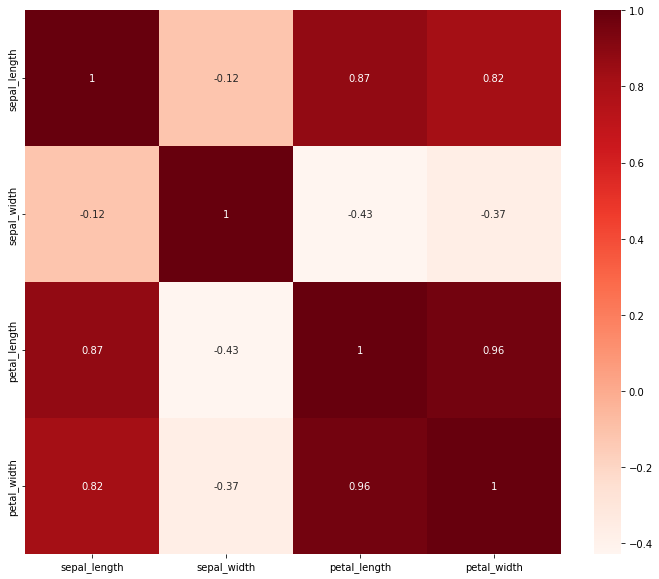

In [8]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
cor_target = abs(cor["sepal_length"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

sepal_length    1.000000
petal_length    0.871754
petal_width     0.817941
Name: sepal_length, dtype: float64

# Model Building and Data Split Using K-Fold

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

In [11]:
data = pandas.read_csv('iris_data.csv')

In [12]:
# get a list of column names
headers = list(data.columns.values)

In [13]:
# separate into independent and dependent variables
x = data[headers[:-1]]
y = data[headers[-1:]].values.ravel()

In [14]:
# set to 10 folds
skf = StratifiedKFold(n_splits=10)

In [15]:
# blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

In [16]:
# partition data
for train_index, test_index in skf.split(x, y):
    # specific ".loc" syntax for working with dataframes
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # create and fit classifier
    classifier = GaussianNB()
    classifier.fit(x_train, y_train)

    # store result from classification
    predicted_y.extend(classifier.predict(x_test))

    # store expected result for this specific fold
    expected_y.extend(y_test)

# Model Evaluation

In [17]:
# Accuracy
metrics.accuracy_score(expected_y, predicted_y)

0.9533333333333334

In [18]:
# Classification Report
metrics.classification_report(expected_y, predicted_y)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        50\nIris-versicolor       0.92      0.94      0.93        50\n Iris-virginica       0.94      0.92      0.93        50\n\n       accuracy                           0.95       150\n      macro avg       0.95      0.95      0.95       150\n   weighted avg       0.95      0.95      0.95       150\n'